In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB



In [ ]:
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
print(df.isnull().sum())

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
# Check again for any NaN values after conversion
print("\nMissing values after mapping weather:")
print(df.isnull().sum())



Missing values after mapping weather:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
X = df.drop('weather',axis=1)
X = df.drop('date',axis=1)
y = df['weather']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train a Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.44368600682593856


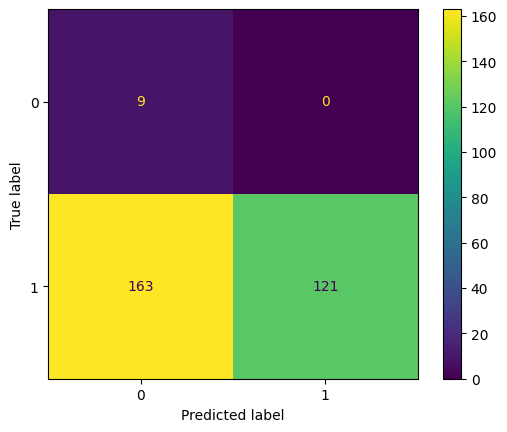

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.datasets import load_iris

data = load_iris()

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


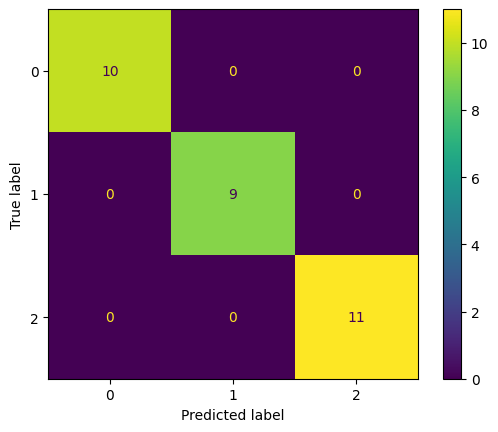

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [ ]:

data = {
'Weather': ['Sunny', 'Snowy', 'Rainy', 'Snowy', 'Sunny', 'Rainy'],
'Target': ['Class1', 'Class2', 'Class1', 'Class2', 'Class1', 'Class2']
}
df = pd.DataFrame(data)
print(df)


  Weather  Target
0   Sunny  Class1
1   Snowy  Class2
2   Rainy  Class1
3   Snowy  Class2
4   Sunny  Class1
5   Rainy  Class2


In [ ]:

le_weather = LabelEncoder()
le_target = LabelEncoder()


In [ ]:

df['Weather_encoded'] = le_weather.fit_transform(df['Weather'])
df['Target_encoded'] = le_target.fit_transform(df['Target'])
print(df)


  Weather  Target  Weather_encoded  Target_encoded
0   Sunny  Class1                2               0
1   Snowy  Class2                1               1
2   Rainy  Class1                0               0
3   Snowy  Class2                1               1
4   Sunny  Class1                2               0
5   Rainy  Class2                0               1


In [ ]:

X = df[['Weather_encoded']]
y = df['Target_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Encoded Predictions:", y_pred)


Encoded Predictions: [0 1]


In [ ]:

decoded_predictions = le_target.inverse_transform(y_pred)
print("Decoded Predictions:", decoded_predictions)



Decoded Predictions: ['Class1' 'Class2']


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)

weather_ohe = ohe.fit_transform(df[['Weather']])

print(weather_ohe)

weather_ohe_df = pd.DataFrame(weather_ohe, columns=ohe.get_feature_names_out(['Weather']))
print(weather_ohe_df)


[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
   Weather_Rainy  Weather_Snowy  Weather_Sunny
0            0.0            0.0            1.0
1            0.0            1.0            0.0
2            1.0            0.0            0.0
3            0.0            1.0            0.0
4            0.0            0.0            1.0
5            1.0            0.0            0.0


In [ ]:

X = weather_ohe_df
y = df['Target_encoded']


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Encoded Predictions:", y_pred)


Encoded Predictions: [0 1]


In [ ]:

decoded_predictions = le_target.inverse_transform(y_pred)
print("Decoded Predictions:", decoded_predictions)


Decoded Predictions: ['Class1' 'Class2']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score


In [ ]:

encoder = OrdinalEncoder(categories=[['Snowy', 'Rainy', 'Sunny']])
df['Weather_Encoded'] = encoder.fit_transform(df[['Weather']])

target_encoder = OrdinalEncoder()
df['Target_Encoded'] = target_encoder.fit_transform(df[['Target']])
print("\nDataFrame with Ordinal Encoding:")
print(df)



DataFrame with Ordinal Encoding:
  Weather  Target  Weather_encoded  Target_encoded  Weather_Encoded  \
0   Sunny  Class1                2               0              2.0   
1   Snowy  Class2                1               1              0.0   
2   Rainy  Class1                0               0              1.0   
3   Snowy  Class2                1               1              0.0   
4   Sunny  Class1                2               0              2.0   
5   Rainy  Class2                0               1              1.0   

   Target_Encoded  
0             0.0  
1             1.0  
2             0.0  
3             1.0  
4             0.0  
5             1.0  


In [ ]:
X = df[['Weather_Encoded']]
y = df['Target_Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model =  GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [ ]:

decoded_predictions = target_encoder.inverse_transform(y_pred.reshape(-1, 1))
print("\nDecoded Predictions:", decoded_predictions.flatten())



Decoded Predictions: ['Class1' 'Class2']
